#Στειροπούλου Ευαγγελία 
###Α.Μ. 111520180016
##Εργασία 2η Αναγνώριση Προτύπων - Μηχανική Μάθηση



#Face recognition: 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people ##Labeled Faces in the Wild
from sklearn.decomposition import PCA
import glob
import re

##Βήμα 1:

numOfImages= 530 // height 62 // width= 47
X.shape (530, 2914)
components.shape (530, 200)
[0.19760376 0.16221265 0.0761281  0.053989   0.04727972 0.02953332
 0.02473817 0.02284924 0.02102675 0.01774243]


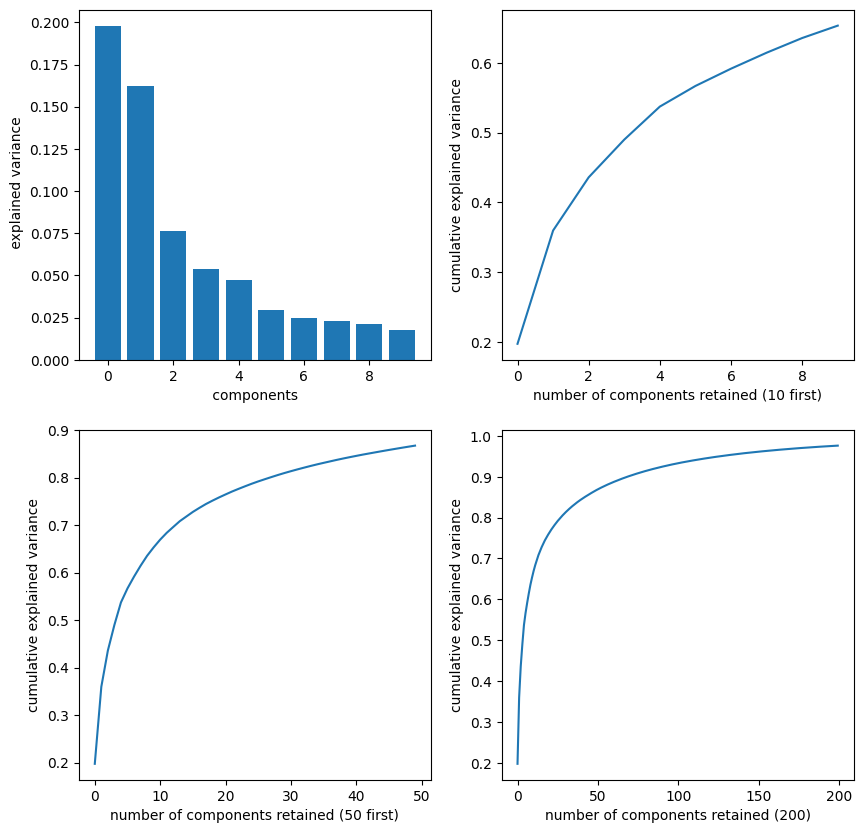

In [4]:
# Load data
imagesDataset = fetch_lfw_people(min_faces_per_person=300) #The extracted dataset will only retain pictures of people that have at least min_faces_per_person different pictures


numOfImages, height, width = imagesDataset.images.shape
print ("numOfImages=",numOfImages,"// height",height,"// width=",width)

X = imagesDataset.data #each image a column)
print ("X.shape",X.shape)
 

# Compute a PCA 
n_components = 200 ## how may componets to keep
pca = PCA(n_components=n_components, whiten=True).fit(X)

#print ("\n--pca--\n",pca)


components = pca.transform(X) ## tranform the data to the new axes system)
print ("components.shape",components.shape)
# print ("\n--components--\n",components)

print (pca.explained_variance_ratio_[:10])

cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
numOfComp=10
plt.subplot(2, 2, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel(' components ')
plt.ylabel(' explained variance');


plt.subplot(2, 2, 2)
plt.plot(cumExplainedVar[:10])
plt.xlabel('number of components retained (10 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 3)
plt.plot(cumExplainedVar[:50])
plt.xlabel('number of components retained (50 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 4)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (200)')
plt.ylabel('cumulative explained variance');

plt.show()

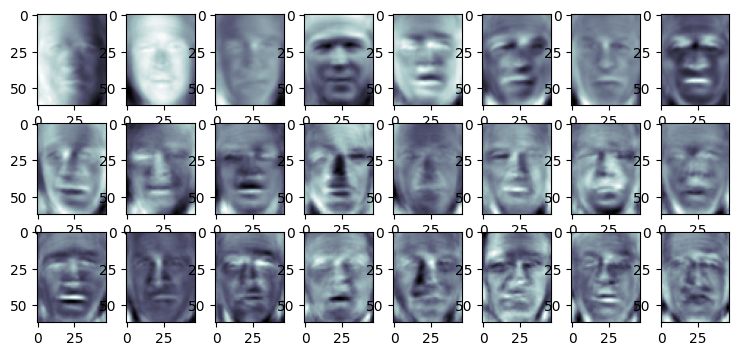

In [5]:
plt.figure(figsize=(9, 4))
for i in range(1,25,1):
  plt.subplot(3, 8, i)
  plt.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

##I: Συνάρτηση loadImages:

In [41]:
def loadImages(path, set_number):
    #read the images from the folder
    print(path+'/'+set_number+"/.png")
    set_folder = path+"/"+set_number
    persons = glob.glob(set_folder+"/*.png")
    faces = [] #list of images as vectors
    labels = [] #list of labels
    for person in persons:
        face = plt.imread(person)
        num_person = int(re.split("_", (re.split(set_folder+"/person", person))[1])[0])
        print(num_person)
        faces.append(face.flatten())
        labels.append(num_person)       
    return faces, labels

faces, labels = loadImages("/home/eva/Documents/machine_learning/project2/faces", '01')

print("Number of images: ", len(faces))
print("Number of labels: ", len(labels))

/home/eva/Documents/machine_learning/project2/faces/01/.png
Number of images:  0
Number of labels:  0
